In [1]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
#https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
#https://www.geeksforgeeks.org/random-forest-regression-in-python/
#https://machinelearningmastery.com/random-forest-ensemble-in-python/
#https://medium.com/@theclickreader/random-forest-regression-explained-with-implementation-in-python-3dad88caf165

In [2]:
# Importing the libraries
import numpy as np # for array operations
import pandas as pd # for working with DataFrames
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline
import seaborn as sns

# scikit-learn modules
from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.metrics import mean_squared_error # for calculating the cost function
from sklearn.ensemble import RandomForestRegressor # for building the model

In [3]:
train_df = pd.read_csv('/Users/aashrit/Documents/Masters/MY498/Data/Time Series/twitter_reddit_time_series_copy3.csv')
train_df = train_df.set_index('date')
#train = train.iloc[20:,:]
train_df

,overall_sentiment_score_20d_lag,overall_attention_score_20d_lag,BEIR,interest_rate_1yr_lag,commodities_1yr_lag,UNRATENSA_1yr_lag,UMCSENT_2wk_lag,WM2NS_1yr_lag,gdp_1yr_lag,USDEUR_1yr_lag
date,,,,,,,,,,
01/06/2021,26.4459,3.900597,2.460,0.05,99.875276,11.2,82.9,17915.4,19477.444,1.224100
02/06/2021,51.3641,2.348224,2.440,0.06,99.875276,11.2,82.9,17915.4,19477.444,1.221300
03/06/2021,48.4431,1.156789,2.420,0.06,99.875276,11.2,82.9,17915.4,19477.444,1.212200
04/06/2021,17.4456,0.903695,2.400,0.06,99.875276,11.2,82.9,17915.4,19477.444,1.217300
05/06/2021,28.1433,0.947890,2.400,0.07,99.875276,11.2,82.9,17915.4,19477.444,1.216933
...,...,...,...,...,...,...,...,...,...,...
27/05/2022,-56.0960,2.735565,2.630,0.06,155.100579,5.5,58.4,20235.1,22740.959,1.070900
28/05/2022,-4.0143,1.563207,2.630,0.05,155.100579,5.5,58.4,20235.1,22740.959,1.069733
29/05/2022,1.4806,3.380288,2.630,0.05,155.100579,5.5,58.4,20235.1,22740.959,1.071044


In [4]:
nobs = 31
df_train, df_test = train_df[0:-nobs], train_df[-nobs:]
df_test

,overall_sentiment_score_20d_lag,overall_attention_score_20d_lag,BEIR,interest_rate_1yr_lag,commodities_1yr_lag,UNRATENSA_1yr_lag,UMCSENT_2wk_lag,WM2NS_1yr_lag,gdp_1yr_lag,USDEUR_1yr_lag
date,,,,,,,,,,
01/05/2022,1.7979,2.171184,2.880,0.05,155.100579,5.5,65.2,20150.2,22740.959,1.052189
02/05/2022,11.3230,9.070342,2.810,0.05,155.100579,5.5,65.2,20150.2,22740.959,1.052100
03/05/2022,-17.5748,7.017218,2.830,0.06,155.100579,5.5,65.2,20275.5,22740.959,1.053200
04/05/2022,-1.6031,4.326948,2.860,0.06,155.100579,5.5,65.2,20275.5,22740.959,1.053900
05/05/2022,16.8282,3.289849,2.870,0.06,155.100579,5.5,65.2,20275.5,22740.959,1.050700
06/05/2022,-6.9053,2.312886,2.860,0.06,155.100579,5.5,65.2,20275.5,22740.959,1.057200
07/05/2022,-4.9242,1.637116,2.860,0.06,155.100579,5.5,65.2,20275.5,22740.959,1.053933
08/05/2022,14.0925,2.516328,2.860,0.06,155.100579,5.5,65.2,20275.5,22740.959,1.053944
09/05/2022,28.9857,2.359621,2.750,0.06,155.100579,5.5,65.2,20275.5,22740.959,1.055900


In [5]:
X_train = df_train.drop(['BEIR'],axis=1)
y_train = df_train['BEIR']
X_test = df_test.drop(['BEIR'],axis=1)
y_test = df_test['BEIR']

In [6]:
df = pd.read_csv('/Users/aashrit/Documents/Masters/MY498/Data/Time Series/final_time_series.csv')
df = df.set_index('date')
df = df[['T10YIE','unemp','int_rate','michigan_sentiment','overall_sentiment_score','overall_attention_score']]
df

,T10YIE,unemp,int_rate,michigan_sentiment,overall_sentiment_score,overall_attention_score
date,,,,,,
12/05/2021,2.540000,5.5,0.06,82.9,26.4459,3.900597
13/05/2021,2.510000,5.5,0.06,82.9,51.3641,2.348224
14/05/2021,2.510000,5.5,0.06,82.9,48.4431,1.156789
15/05/2021,2.521818,5.5,0.06,82.9,17.4456,0.903695
16/05/2021,2.521818,5.5,0.06,82.9,28.1433,0.947890
...,...,...,...,...,...,...
27/05/2022,2.630000,3.4,0.83,58.4,8.4403,2.447695
28/05/2022,2.521818,3.4,0.83,58.4,18.5019,2.114690
29/05/2022,2.521818,3.4,0.83,58.4,24.0466,1.742053


### No HP Optimisation

In [7]:
# Initializing the Random Forest Regression model with 10 decision trees
model = RandomForestRegressor(n_estimators = 10, random_state = 0)

# Fitting the Random Forest Regression model to the data
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [8]:
# Predicting the target values of the test set
y_pred = model.predict(X_test)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  0.206


In [9]:
error = (rmse/np.mean(y_test))*100
error
#We see that the RMSE is quite low compared to the mean (7.2% of the size of the mean overall), 
#which means that XGBoost did quite a good job at predicting the values of the test set. 

7.655789196058215

In [10]:
y_pred

array([2.894 , 2.902 , 2.905 , 2.905 , 2.909 , 2.907 , 2.893 , 2.907 ,
       2.917 , 2.903 , 2.907 , 2.8986, 2.898 , 2.901 , 2.878 , 2.858 ,
       2.861 , 2.847 , 2.851 , 2.84  , 2.8616, 2.854 , 2.855 , 2.859 ,
       2.839 , 2.839 , 2.849 , 2.892 , 2.839 , 2.845 , 2.822 ])

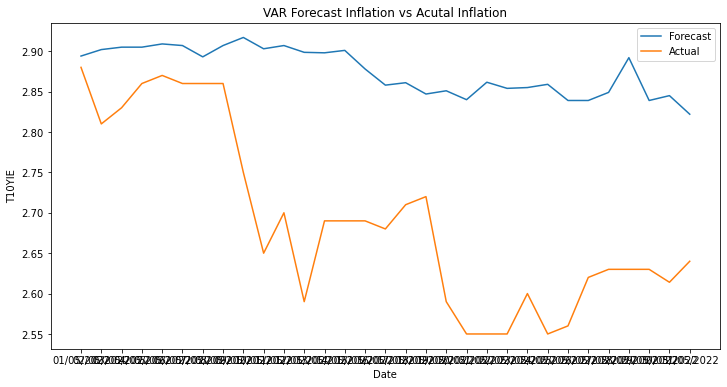

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df_test.index, y_pred, label = "Forecast")
# plotting the line 2 points 
plt.plot(df_test.index, y_test, label = "Actual")
plt.xlabel('Date')
# Set the y axis label of the current axis.
plt.ylabel('T10YIE')
# Set a title of the current axes.
plt.title('VAR Forecast Inflation vs Acutal Inflation')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [12]:
def train_test_plot(model, X_train, X_test, name):
    """
    This will plot the actual values of CPI against the one fitted by the model
    We train the model until 2009 and then use it from 2009 onwards on the test features dataset
    """
    fig, ax = plt.subplots(figsize=(12,6))
    colors = sns.color_palette("deep", 8)
    plt.ylim(2.5,3.25)
    
    yvalues = pd.DataFrame(y_test)
    
    forecasted = list(model.predict(X_test)) # Use the model fit on features data from 2009 onwards
    df_fcast = pd.DataFrame({"Date": list(yvalues.index), "BEIR_fcast": forecasted})
    df_fcast = df_fcast.set_index("Date")
    
    df = pd.merge(yvalues, df_fcast, left_index=True, right_index=True)

    df["BEIR_fcast"].plot(ax=ax, legend=True, linewidth=2.5, linestyle="dashed", color="forestgreen") # CPI fitted
    df["BEIR"].plot(ax=ax, legend=True, linewidth=1.5, linestyle="solid", color="salmon") # Actual CPI values
    
    ax.set_title("Forecasted BEIR vs. Actual BEIR")
    ax.set_ylabel("BEIR")
    ax.set_xlabel("Date")
    ax.legend(["Forecasted BEIR","Actual BEIR"])
    plt.savefig(name)
    print(df)

In [13]:
#train_test_plot(model, X_train, X_test, 'rf_forecast.png'):

### Grid Search

In [14]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state = 0)

n_estimators = [int(x) for x in np.linspace(start = 1, stop = 20, num = 20)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)]
min_samples_split = [2, 6, 10]
min_samples_leaf = [1, 3, 4]
bootstrap = [True, False]


grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

rf_grid = GridSearchCV(estimator = rf, param_grid = grid, cv = 5, n_jobs = -1)

rf_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       110, 120],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 3, 4],
                         'min_samples_split': [2, 6, 10],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20]})

In [15]:
# this prints the contents of the parameters in the random grid
print ('Random grid: ', grid, '\n')

# print the best parameters
print ('Best Parameters: ', rf_grid.best_params_, ' \n')

Random grid:  {'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 7}  



In [16]:
#4 Fitting the Support Vector Regression Model to the dataset
# Create your support vector regressor here
from sklearn.svm import SVR
# most important SVR parameter is Kernel type. It can be #linear,polynomial or gaussian SVR. We have a non-linear condition #so we can select polynomial or gaussian but here we select RBF(a #gaussian type) kernel.
tree = RandomForestRegressor(random_state = 0,
                             n_estimators = rf_grid.best_params_['n_estimators'], 
                             max_features = rf_grid.best_params_['max_features'],
                             max_depth= rf_grid.best_params_['max_depth'],
                             min_samples_split= rf_grid.best_params_['min_samples_split'],
                             min_samples_leaf= rf_grid.best_params_['min_samples_leaf'],
                             bootstrap= rf_grid.best_params_['bootstrap'],)
tree.fit(X_train,y_train)
#5 Predicting a new result
y_pred = tree.predict(X_test)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  0.215


In [21]:
y_pred1 = []
for i in range(len(y_pred)):
    y_pred1.append(y_pred[i])
    #print(y_pred.iloc[i,0])
    
print(max(y_pred1))
print(min(y_pred1))

2.9309944444444445
2.8577097505668934


In [22]:
error = (rmse/np.mean(y_test))*100
error
#We see that the RMSE is quite low compared to the mean (7.2% of the size of the mean overall), 
#which means that XGBoost did quite a good job at predicting the values of the test set. 

7.990265423070468

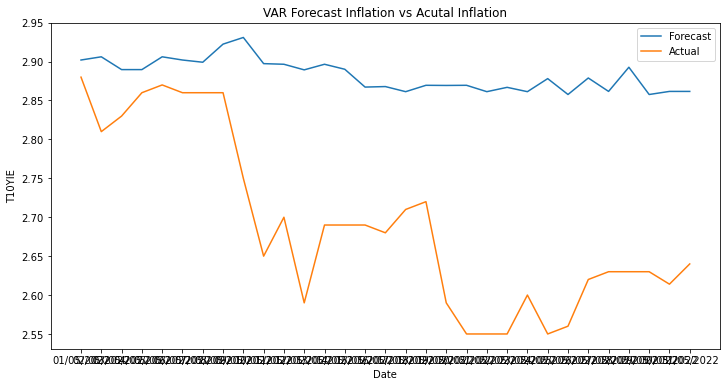

In [23]:
plt.figure(figsize=(12,6))
plt.plot(df_test.index, y_pred, label = "Forecast")
# plotting the line 2 points 
plt.plot(df_test.index, y_test, label = "Actual")
plt.xlabel('Date')
# Set the y axis label of the current axis.
plt.ylabel('T10YIE')
# Set a title of the current axes.
plt.title('VAR Forecast Inflation vs Acutal Inflation')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [24]:
n_estimators
max_features

['auto', 'sqrt']

### Random Search

In [25]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 1, stop = 20, num = 20)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)]
min_samples_split = [2, 6, 10]
min_samples_leaf = [1, 3, 4]
bootstrap = [True, False]


random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=9; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=8; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=19; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=19; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=12; total time=   0.3s
[CV] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=12; total time=   0.2s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=9; total tim

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19,
                                                         20]},
                   random_state=35, verbose=2)

In [26]:
# this prints the contents of the parameters in the random grid
print ('Random grid: ', random_grid, '\n')

# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 16, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': True}  



In [27]:
#4 Fitting the Support Vector Regression Model to the dataset
# Create your support vector regressor here
from sklearn.svm import SVR
# most important SVR parameter is Kernel type. It can be #linear,polynomial or gaussian SVR. We have a non-linear condition #so we can select polynomial or gaussian but here we select RBF(a #gaussian type) kernel.
tree = RandomForestRegressor(random_state = 0,
                             n_estimators = rf_grid.best_params_['n_estimators'], 
                             max_features = rf_grid.best_params_['max_features'],
                             max_depth= rf_grid.best_params_['max_depth'],
                             min_samples_split= rf_grid.best_params_['min_samples_split'],
                             min_samples_leaf= rf_grid.best_params_['min_samples_leaf'],
                             bootstrap= rf_grid.best_params_['bootstrap'],)
tree.fit(X_train,y_train)
#5 Predicting a new result
y_pred = tree.predict(X_test)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  0.215


In [28]:
error = (rmse/np.mean(y_test))*100
error
#We see that the RMSE is quite low compared to the mean (7.2% of the size of the mean overall), 
#which means that XGBoost did quite a good job at predicting the values of the test set. 

7.990265423070468

estimators=17; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=11; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=11; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=11; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=10; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=10; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=10; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=10; total time=   0.1s
[CV] END bootstrap=Tr

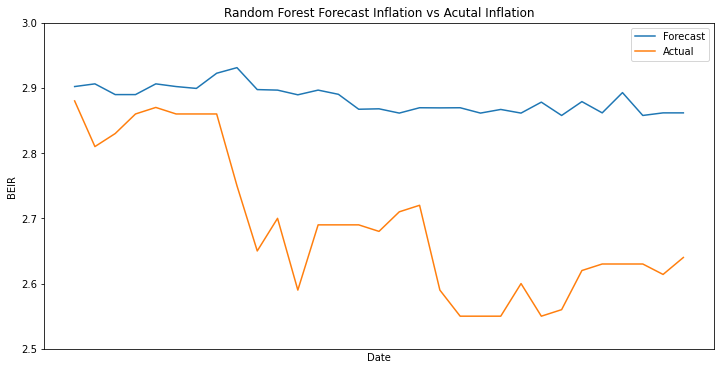

0s
[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=5; total time=   0.1s
[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=5; total time=   0.1s
[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=5; total time=   0.1s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=11; total time=   0.1s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=11; total time=   0.1s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=11; total time=   0.1s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=11; total time=   0.1s
[CV] END bootstrap=True, max_depth=60, max_featu

In [29]:
plt.figure(figsize=(12,6))
plt.plot(df_test.index, y_pred, label = "Forecast")
# plotting the line 2 points 
plt.plot(df_test.index, y_test, label = "Actual")
plt.xlabel('Date')
# Set the y axis label of the current axis.
plt.ylabel('BEIR')
# Set a title of the current axes.
plt.title('Random Forest Forecast Inflation vs Acutal Inflation')
# show a legend on the plot
plt.legend()
plt.ylim(2.5,3)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
# Display a figure.
plt.savefig("rf_forecast.png")
plt.show()

In [30]:

y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred)

res=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=5; total time=   0.1s
[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=5; total time=   0.1s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=15; total time=   0.2s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=15; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=6; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=6; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=13; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_es

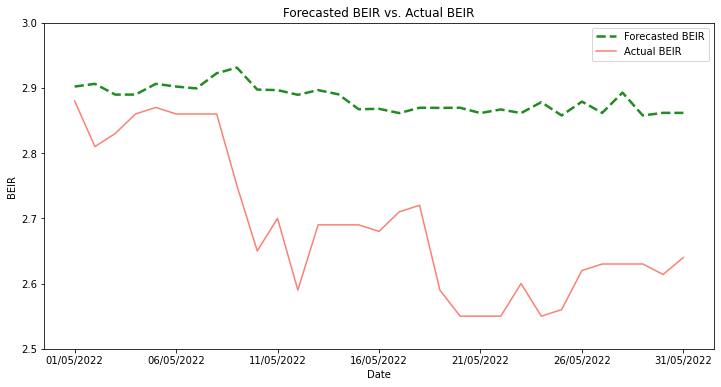

In [31]:
fig, ax = plt.subplots(figsize=(12,6))
colors = sns.color_palette("deep", 8)
plt.ylim(2.5,3)
    
yvalues = pd.DataFrame(y_test)
    
y_pred[0].plot(ax=ax, legend=True, linewidth=2.5, linestyle="dashed", color="forestgreen") # CPI fitted
y_test["BEIR"].plot(ax=ax, legend=True, linewidth=1.5, linestyle="solid", color="salmon") # Actual CPI values
    
ax.set_title("Forecasted BEIR vs. Actual BEIR")
ax.set_ylabel("BEIR")
ax.set_xlabel("Date")
ax.legend(["Forecasted BEIR","Actual BEIR"])
#plt.savefig('rf_forecast.png')



In [32]:
def train_test_plot(model, X_train, X_test, name):
    """
    This will plot the actual values of CPI against the one fitted by the model
    We train the model until 2009 and then use it from 2009 onwards on the test features dataset
    """
    fig, ax = plt.subplots(figsize=(12,6))
    colors = sns.color_palette("deep", 8)
    plt.ylim(2.5,3.25)
    
    yvalues = pd.DataFrame(y_test)
    
    forecasted = list(model.predict(X_test)) # Use the model fit on features data from 2009 onwards
    df_fcast = pd.DataFrame({"Date": list(yvalues.index), "BEIR_fcast": forecasted})
    df_fcast = df_fcast.set_index("Date")
    
    df = pd.merge(yvalues, df_fcast, left_index=True, right_index=True)

    df["BEIR_fcast"].plot(ax=ax, legend=True, linewidth=2.5, linestyle="dashed", color="forestgreen") # CPI fitted
    df["BEIR"].plot(ax=ax, legend=True, linewidth=1.5, linestyle="solid", color="salmon") # Actual CPI values
    
    ax.set_title("Forecasted BEIR vs. Actual BEIR")
    ax.set_ylabel("BEIR")
    ax.set_xlabel("Date")
    ax.legend(["Forecasted BEIR","Actual BEIR"])
    plt.savefig(name)
    print(df)

             BEIR  BEIR_fcast
date                         
01/05/2022  2.880    2.902024
02/05/2022  2.810    2.906146
03/05/2022  2.830    2.889703
04/05/2022  2.860    2.889703
05/05/2022  2.870    2.906146
06/05/2022  2.860    2.902024
07/05/2022  2.860    2.899167
08/05/2022  2.860    2.922432
09/05/2022  2.750    2.930994
10/05/2022  2.650    2.897372
11/05/2022  2.700    2.896565
12/05/2022  2.590    2.889371
13/05/2022  2.690    2.896565
14/05/2022  2.690    2.890135
15/05/2022  2.690    2.867239
16/05/2022  2.680    2.867904
17/05/2022  2.710    2.861342
18/05/2022  2.720    2.869536
19/05/2022  2.590    2.869343
20/05/2022  2.550    2.869536
21/05/2022  2.550    2.861342
22/05/2022  2.550    2.866917
23/05/2022  2.600    2.861342
24/05/2022  2.550    2.878118
25/05/2022  2.560    2.857710
26/05/2022  2.620    2.878925
27/05/2022  2.630    2.861674
28/05/2022  2.630    2.892737
29/05/2022  2.630    2.857710
30/05/2022  2.614    2.861674
31/05/2022  2.640    2.861674


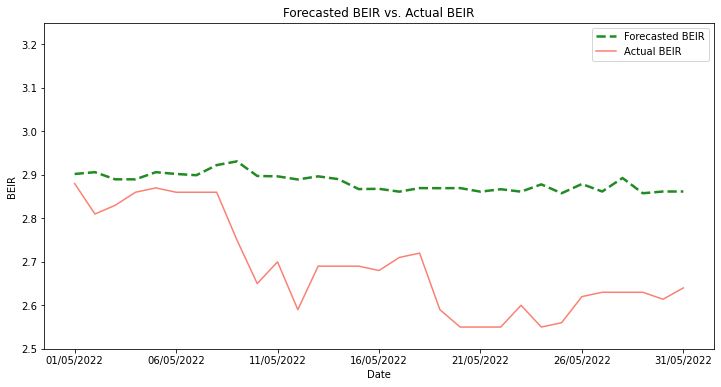

In [33]:
train_test_plot(tree, X_train, X_test, 'rf_')

In [34]:
#https://medium.com/@anthonycarlleston/visualizing-the-decisiontrees-in-randomforestregressor-in-a-pipeline-with-python-f5519f80e3f8

In [35]:
X_train

,overall_sentiment_score_20d_lag,overall_attention_score_20d_lag,interest_rate_1yr_lag,commodities_1yr_lag,UNRATENSA_1yr_lag,UMCSENT_2wk_lag,WM2NS_1yr_lag,gdp_1yr_lag,USDEUR_1yr_lag
date,,,,,,,,,
01/06/2021,26.4459,3.900597,0.05,99.875276,11.2,82.9,17915.4,19477.444,1.224100
02/06/2021,51.3641,2.348224,0.06,99.875276,11.2,82.9,17915.4,19477.444,1.221300
03/06/2021,48.4431,1.156789,0.06,99.875276,11.2,82.9,17915.4,19477.444,1.212200
04/06/2021,17.4456,0.903695,0.06,99.875276,11.2,82.9,17915.4,19477.444,1.217300
05/06/2021,28.1433,0.947890,0.07,99.875276,11.2,82.9,17915.4,19477.444,1.216933
...,...,...,...,...,...,...,...,...,...
26/04/2022,27.5878,2.004162,0.07,145.041207,5.7,65.2,20150.2,22740.959,1.066100
27/04/2022,21.1544,1.617477,0.07,145.041207,5.7,65.2,20150.2,22740.959,1.054900
28/04/2022,17.5450,1.453405,0.07,145.041207,5.7,65.2,20150.2,22740.959,1.050000


### Visualising Trees

In [36]:
#https://medium.com/@anthonycarlleston/visualizing-the-decisiontrees-in-randomforestregressor-in-a-pipeline-with-python-f5519f80e3f8

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

In [38]:
# Initializing the Random Forest Regression model with 10 decision trees
model = RandomForestRegressor(n_estimators = 10, random_state = 0)

pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reduce_dim', PCA()),
        ('regressor', model)
        ])

# Fitting the Random Forest Regression model to the data
pipe.fit(X_train, y_train)
ypipe=pipe.predict(X_test)

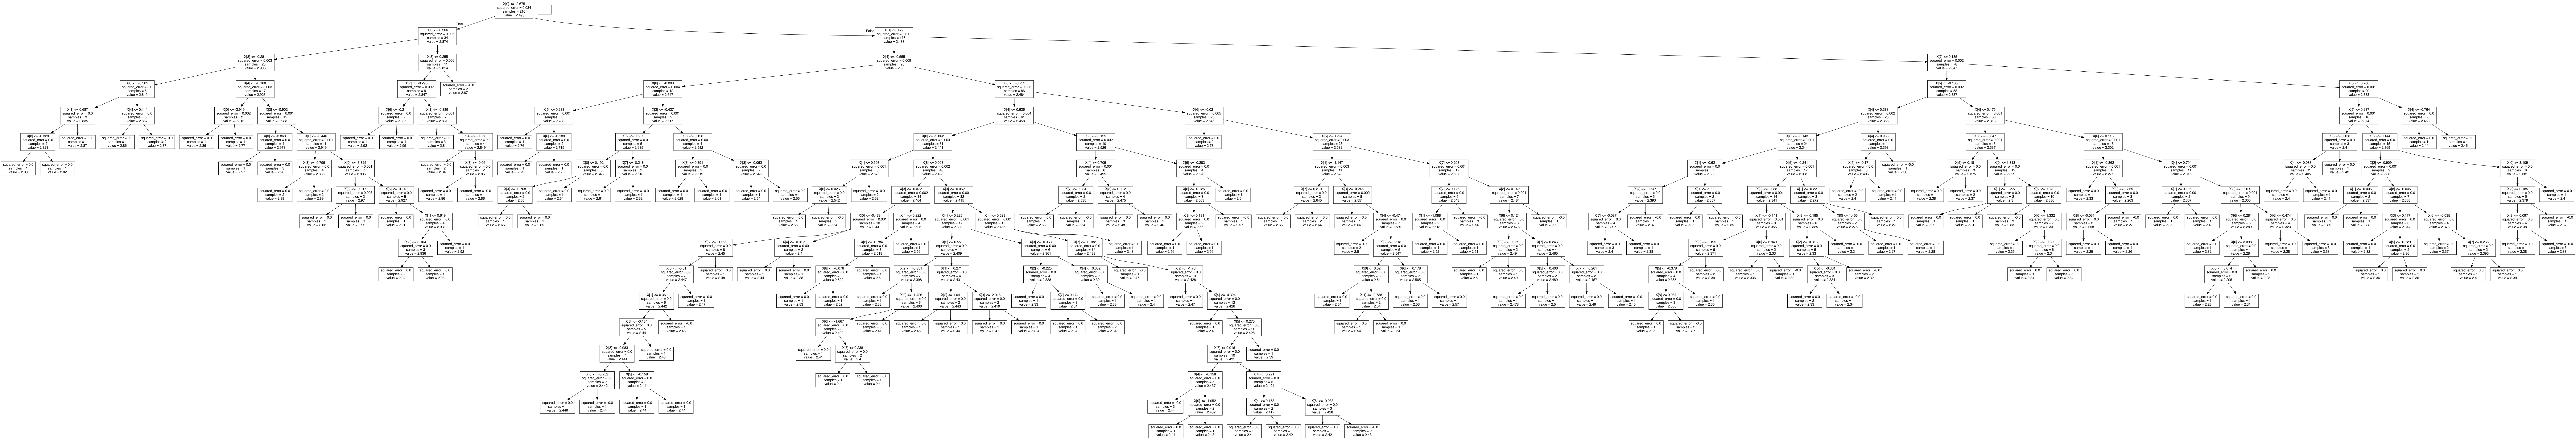

In [39]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
dot_data = StringIO()
export_graphviz(pipe.named_steps['regressor'].estimators_[0], out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

In [40]:
#https://mljar.com/blog/visualize-tree-from-random-forest/
#https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c

### Feature Importance

In [41]:
#https://stackoverflow.com/questions/44101458/random-forest-feature-importance-chart-using-python
#https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html


Feature: 0, Score: 0.01007
Feature: 1, Score: 0.01575
Feature: 2, Score: 0.00310
Feature: 3, Score: 0.13787
Feature: 4, Score: 0.38880
Feature: 5, Score: 0.01025
Feature: 6, Score: 0.34465
Feature: 7, Score: 0.00048
Feature: 8, Score: 0.08904


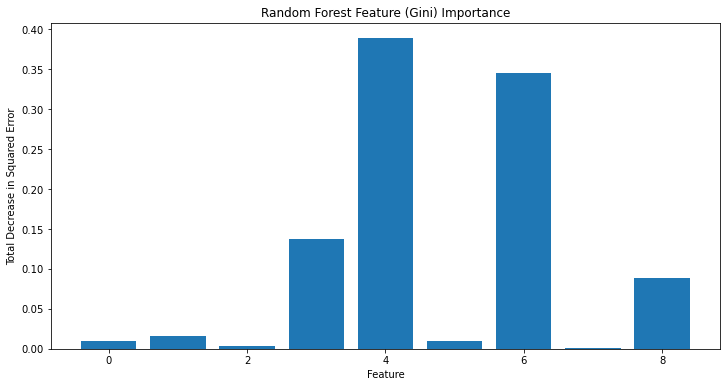

In [42]:
#https://machinelearningmastery.com/calculate-feature-importance-with-python/
# random forest for feature importance on a regression problem
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize = (12,6))
plt.title('Random Forest Feature (Gini) Importance')
plt.bar([x for x in range(len(importance))], importance)
plt.xlabel("Feature")
plt.ylabel("Total Decrease in Squared Error")
plt.savefig('rf_feature_importance.png',bbox_inches='tight')
plt.show()


#Shows Feature importance based on mean decrease in impurity
#https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

In [43]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.feature_importances_
#feature_importances_: The impurity-based feature importances.
#The higher, the more important the feature. The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.

Elapsed time to compute the importances: 0.032 seconds


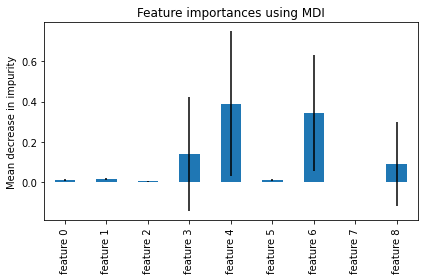

In [44]:
import time
import numpy as np
feature_names = [f"feature {i}" for i in range(X_train.shape[1])]
start_time = time.time()
importances = model.feature_importances_
std = np.std([model.feature_importances_ for model in model.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [45]:
X_train.columns

Index(['overall_sentiment_score_20d_lag', 'overall_attention_score_20d_lag',
       'interest_rate_1yr_lag', 'commodities_1yr_lag', 'UNRATENSA_1yr_lag',
       'UMCSENT_2wk_lag', 'WM2NS_1yr_lag', 'gdp_1yr_lag', 'USDEUR_1yr_lag'],
      dtype='object')

In [46]:
#https://stats.stackexchange.com/questions/220321/what-is-node-impurity-purity-in-decision-trees-in-plain-english-why-do-we-need

In [47]:
#Testing Without These Metrics

In [48]:
X_train1 = X_train.iloc[:,2:]
X_test1 = X_test.iloc[:,2:]

In [49]:
# Initializing the Random Forest Regression model with 10 decision trees
model = RandomForestRegressor(n_estimators = 10, random_state = 0)

# Fitting the Random Forest Regression model to the data
model.fit(X_train1, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [50]:
# Predicting the target values of the test set
y_pred1 = model.predict(X_test1)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred1)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  0.234


In [51]:
error = (rmse/np.mean(y_test))*100
error
#We see that the RMSE is quite low compared to the mean (7.2% of the size of the mean overall), 
#which means that XGBoost did quite a good job at predicting the values of the test set. 

BEIR    8.696382
dtype: float64

In [52]:
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred)
y_pred1 = pd.DataFrame(y_pred1)
y_test.columns = ['BEIR']
y_pred.columns = ['BEIR_forecast']
y_pred1.columns = ['BEIR_forecast']

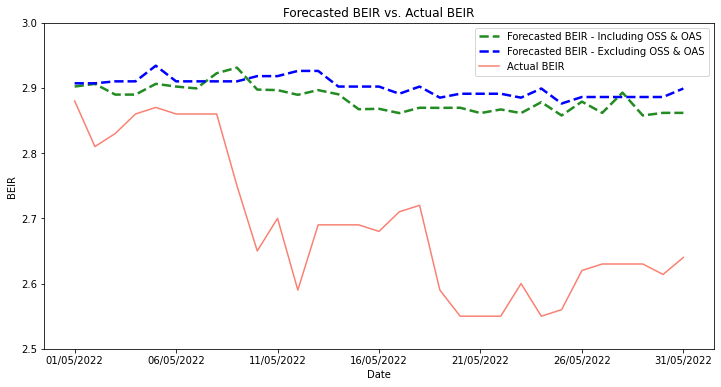

In [54]:
fig, ax = plt.subplots(figsize=(12,6))
colors = sns.color_palette("deep", 8)
plt.ylim(2.5,3)
    
yvalues = pd.DataFrame(y_test)
    
y_pred['BEIR_forecast'].plot(ax=ax, legend=True, linewidth=2.5, linestyle="dashed", color="forestgreen") # CPI fitted
y_pred1['BEIR_forecast'].plot(ax=ax, legend=True, linewidth=2.5, linestyle="dashed", color="blue") # CPI fitted
y_test['BEIR'].plot(ax=ax, legend=True, linewidth=1.5, linestyle="solid", color="salmon") # Actual CPI values
    
ax.set_title("Forecasted BEIR vs. Actual BEIR")
ax.set_ylabel("BEIR")
ax.set_xlabel("Date")
ax.legend(["Forecasted BEIR - Including OSS & OAS","Forecasted BEIR - Excluding OSS & OAS",'Actual BEIR'])
#plt.savefig('rf_forecast.png')

In [59]:
y_pred#include
y_pred1#exclude

,BEIR_forecast
0,2.902024
1,2.906146
2,2.889703
3,2.889703
4,2.906146
5,2.902024
6,2.899167
7,2.922432
8,2.930994
9,2.897372


In [60]:
y_pred['BEIR_forecast_exc'] = y_pred1['BEIR_forecast']


,BEIR_forecast,BEIR_forecast_exc
0,2.902024,2.907
1,2.906146,2.907
2,2.889703,2.910
3,2.889703,2.910
4,2.906146,2.934
5,2.902024,2.910
6,2.899167,2.910
7,2.922432,2.910
8,2.930994,2.910
9,2.897372,2.918


In [62]:
y_pred.to_csv('rf_forecast_comp.csv')

In [68]:
y_pred = y_pred.iloc[:,0]
y_pred.to_csv('rf.csv')